In [1]:
import numpy as np
import pickle
import os, sys
sys.path.append('..')

from quantumCircuit.methods.aux_methods import *
from quantumCircuit.methods.states import *
from quantumCircuit.methods.gates import *

from matplotlib import pyplot as plt

**Site dependent birpartite entanglement entropy**

Code for loading and processing data

In [2]:
""" Bipartite entanglement entropy plots
"""

L = 20
g = 1.2
h = 0.1

save_filename = f"Ising_GS_L{L}_g{g}_h{h}".replace(".","-")
print("HPC_data/ED/"+save_filename+"_ED")
V = load_obj("HPC_data/ED/"+save_filename+"_ED")
psi = State.vector(V)

entropy_exact = [psi.bipartiteEE([x for x in range(y)]) for y in range(L+1) ]
entropy_list = [entropy_exact]

N_iter = 5000

for depth in range(1,8):
    data = load_obj("HPC_data/circuits/"+save_filename+f"_depth{depth}_N_iter{N_iter}_circuit")
    psi_circuit = State.vector(data["state"].reshape((-1,1)))
    entropy_list.append([psi_circuit.bipartiteEE([x for x in range(y)]) for y in range(L+1) ])

HPC_data/ED/Ising_GS_L20_g1-2_h0-1_ED


Plot the data

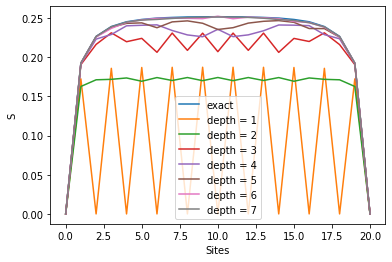

In [3]:
for entropy in entropy_list:
    plt.plot(entropy)

plt.xlabel("Sites")
plt.ylabel("S")
plt.legend(["exact"] + [f"depth = {x+1}" for x in range(len(entropy)-1)])
plt.show()

**Time-dependent half-chain entropy**

Loading and processing data

In [4]:
""" Bipartite entanglement entropy plots
"""

L = 20
g = 1.4
h = 0.1

T_list = np.linspace(0.25,4,16)

entropy_exact = []

for T in T_list:

    save_filename = f"Ising_evolution_L{L}_g{g}_h{h}_T{T}".replace(".","-")
    V = load_obj("HPC_data/ED_evolution/"+save_filename+"_evolution")
    psi = State.vector(V)

    entropy_exact.append(psi.bipartiteEE([x for x in range(L//2)]))
entropy_list = [entropy_exact]

N_iter = 5000

for depth in range(1,7):
    entropy = []
    for T in T_list:
        save_filename = f"Ising_evolution_L{L}_g{g}_h{h}_T{T}".replace(".","-")
        data = load_obj("HPC_data/circuits_evolution/"+save_filename+f"_depth{depth}_N_iter{N_iter}_circuit")
        psi_circuit = State.vector(data["state"].reshape((-1,1)))
        entropy.append(psi_circuit.bipartiteEE([x for x in range(L//2)]))
    entropy_list.append(entropy)


Plot data

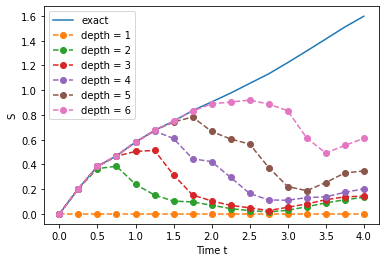

In [5]:
plt.plot([0] + list(T_list),[0] + entropy_list[0])

for entropy in entropy_list[1:]:
    plt.plot([0] + list(T_list),[0] + entropy, 'o--')

plt.xlabel("Time t")
plt.ylabel("S")
plt.legend(["exact"] + [f"depth = {x+1}" for x in range(len(entropy)-1)])
plt.show()

In [6]:
""" Bipartite entanglement entropy plots
"""

L = 20
g = 1.2
h = 0.1

save_filename = f"Ising_GS_L{L}_g{g}_h{h}".replace(".","-")
print("HPC_data/ED/"+save_filename+"_ED")
V = load_obj("HPC_data/ED/"+save_filename+"_ED")
psi = State.vector(V)

depth = 5
N_iter = 5000
data = load_obj("HPC_data/circuits/"+save_filename+f"_depth{depth}_N_iter{N_iter}_circuit")
psi_circuit = State.vector(data["state"].reshape((-1,1)))

MI_exact = []
MI = []
for kk in range(1,10):
    qubits = [(kk-1)/2 + x for x in range(L-kk)]
    MI_exact.append(np.array([psi.mutualInformation([y],[y+kk]) for y in range(L-kk)]))
    MI.append(np.array([psi_circuit.mutualInformation([y],[y+kk]) for y in range(L-kk)]))


HPC_data/ED/Ising_GS_L20_g1-2_h0-1_ED


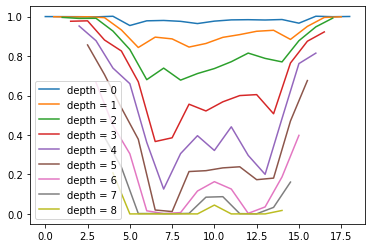

In [7]:
for kk in range(len(MI)):
    qubits = [(kk)/2 + x for x in range(L-kk-1)]
    plt.plot(qubits,MI[kk]/MI_exact[kk])
plt.legend([f"depth = {x}" for x in range(9)])
plt.show()

In [2]:
""" Mutual information time evolution
"""

L = 20
g = 1.4
h = 0.9045

T_list = np.linspace(0.25,4,16)

entropy_exact = []

depth = 2
N_iter = 5000

k_range = 4

MI_exact_list = []
MI_list = []
for T in T_list:

    save_filename = f"Ising_evolution_L{L}_g{g}_h{h}_T{T}".replace(".","-")
    V = load_obj("HPC_data/ED_evolution/"+save_filename+"_evolution")
    psi = State.vector(V)

    save_filename = f"Ising_evolution_L{L}_g{g}_h{h}_T{T}".replace(".","-")
    data = load_obj("HPC_data/circuits_evolution/"+save_filename+f"_depth{depth}_N_iter{N_iter}_circuit")
    psi_circuit = State.vector(data["state"].reshape((-1,1)))

    qubits = [(k_range-1)/2 + x for x in range(L-k_range)]
    MI_exact = (np.array([psi.mutualInformation([y],[y+k_range]) for y in range(L-k_range)]))
    MI = (np.array([psi_circuit.mutualInformation([y],[y+k_range]) for y in range(L-k_range)]))
    MI_list.append(np.average(MI))
    MI_exact_list.append(np.average(MI_exact))


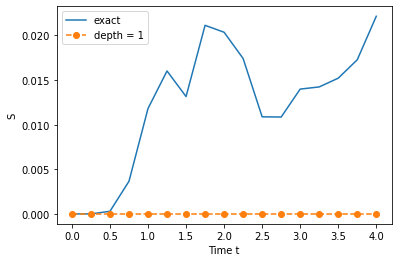

In [9]:
plt.plot([0] + list(T_list),[0] + MI_exact_list)
plt.plot([0] + list(T_list),[0] + MI_list, 'o--')

plt.xlabel("Time t")
plt.ylabel("S")
plt.legend(["exact"] + [f"depth = {x+1}" for x in range(len(entropy)-1)])
plt.show()

In [3]:
L = 20
g = 1.2
h = 0.1

save_filename = f"Ising_GS_L{L}_g{g}_h{h}".replace(".","-")
print("HPC_data/ED/"+save_filename+"_ED")
V = load_obj("HPC_data/ED/"+save_filename+"_ED")
psi = State.vector(V)

rho = psi.reducedDensityMatrix([0,1,2,3])

new_psi = rho.canonical_purification()

print(new_psi.bipartiteEE([0,1,3,4]))
print(new_psi.N)
print(rho.reflected_entropy([0,1]))
print(rho.reflected_h([1,2]))

HPC_data/ED/Ising_GS_L20_g1-2_h0-1_ED
[[[[[[[[ 1.79173598e-03+0.j  4.93528596e-04+0.j]
       [-1.59999286e-04+0.j -7.87584772e-03+0.j]]

      [[ 2.90966861e-04+0.j  3.31756791e-03+0.j]
       [-1.72907626e-03+0.j -1.32397867e-03+0.j]]]


     [[[-1.10106176e-05+0.j -8.22446224e-03+0.j]
       [ 3.58918364e-03+0.j  4.29349974e-05+0.j]]

      [[-8.31958488e-03+0.j -1.20990824e-03+0.j]
       [ 3.04081687e-04+0.j  3.78972393e-02+0.j]]]]



    [[[[ 4.93528596e-04+0.j  6.17708312e-04+0.j]
       [-1.02104682e-03+0.j -1.97897799e-03+0.j]]

      [[ 5.23280448e-04+0.j  8.90606274e-04+0.j]
       [-5.73567547e-04+0.j -9.76622348e-04+0.j]]]


     [[[-1.08063773e-03+0.j -2.02034775e-03+0.j]
       [ 8.61002845e-04+0.j  1.23386973e-03+0.j]]

      [[-2.15603449e-03+0.j -2.51746026e-03+0.j]
       [ 4.77273448e-03+0.j  9.37608663e-03+0.j]]]]]




   [[[[[-1.59999286e-04+0.j -1.02104682e-03+0.j]
       [ 2.03054549e-03+0.j  3.06523068e-04+0.j]]

      [[-9.35866140e-04+0.j -2.45046238e-04+0.j]